In [84]:
import pandas as pd

otu_df = pd.read_csv('dataframes/OTU.txt', sep='\t')
hiera_blast = pd.read_csv('dataframes/hiera_BLAST.txt', sep='\t')
meta_map = pd.read_csv('dataframes/MCOSIS_map.txt', sep='\t')
meta = pd.read_csv('dataframes/antibiotics kazakh finished.csv', sep='\t')

In [85]:
meta = meta[['ID', 'sample', 'day of research', 'intervention', 'date of birth']]
meta_map_expanded = meta_map.set_index('#SampleID').fastqFile.str.split(',', expand=True).stack().reset_index(name='fastqFile').drop('level_1', axis=1)

# Соединение таблиц
merged = pd.merge(meta, meta_map_expanded, left_on='ID', right_on='fastqFile')

# Замена старых значений 'ID' на новые из '#SampleID'
meta['ID'] = merged['#SampleID']

# Показываем результат
meta.head()

,ID,sample,day of research,intervention,date of birth
0,SMPL0,1,40,yes,23.10.2012
1,SMPL1,1,45,yes,23.10.2012
2,SMPL2,1,50,yes,23.10.2012
3,SMPL3,1,55,yes,23.10.2012
4,SMPL4,1,60,yes,23.10.2012


In [86]:
meta_result = meta[meta['day of research'].astype(str).str.contains('1|60|55', na=False)]
meta_result = meta_result[~meta_result['day of research'].astype(str).str.contains(r'\b10\b|\b15\b', na=False) | (meta_result['day of research'].astype(str) == '55')]
#meta_result = meta_result[~meta_result['day of research'].astype(str).str.contains(r'\b10\b|\b15\b', na=False)]
meta_result = meta_result[~meta_result['ID'].astype(str).str.contains('^SMPL6$', regex=True, na=False)]
meta_result = meta_result[~meta_result['ID'].astype(str).str.contains('^SMPL3$', regex=True, na=False)]

meta_result = meta_result[~meta_result['ID'].astype(str).str.contains('SMPL80|SMPL95|SMPL89|SMPL23|SMPL68|SMPL66|SMPL56|SMPL35|SMPL55|SMPL83|SMPL110|SMPL100', na=False)]

meta_result

,ID,sample,day of research,intervention,date of birth
4,SMPL4,1,60,yes,23.10.2012
5,SMPL5,2,1,no,09.12.2014
24,SMPL24,3,60,yes,19.11.2013
36,SMPL36,5,1,no,21.08.2014
43,SMPL43,6,1,no,15.04.2014
67,SMPL67,4,1,yes,19.05.2014
76,SMPL76,3,1,yes,19.11.2013
78,SMPL78,1,1,yes,23.10.2012
90,SMPL90,2,60,no,09.12.2014
92,SMPL92,4,60,yes,19.05.2014


In [87]:
# Транспонирование otu_df
otu_df_transposed = otu_df.set_index('OTU').T
otu_df_transposed = otu_df_transposed.reset_index().rename(columns={'index': 'SampleID'})

# Переименование столбцов в meta_result для соответствия с otu_df_transposed
meta_result = meta_result.rename(columns={'ID': 'SampleID', 'intervention': 'GROUP'})

# Объединение таблиц
merged_df = pd.merge(meta_result, otu_df_transposed, on='SampleID')

# Переименование столбцов OTU
for col in merged_df.columns:
    if 'OTU' in col:
        merged_df = merged_df.rename(columns={col: col.replace('OTU_', 'OTU')})

# Вывод результата
merged_df_group = merged_df.drop(columns=['GROUP', 'date of birth'])
merged_df = merged_df.drop(columns=['GROUP', 'date of birth'])

merged_df_group

,SampleID,sample,day of research,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,...,OTU4190,OTU4191,OTU4192,OTU4193,OTU4194,OTU4195,OTU4196,OTU4197,OTU4198,OTU4199
0,SMPL4,1,60,15,3,2,8,123,2,1,...,0,0,0,0,0,0,0,0,0,0
1,SMPL5,2,1,147,27,57,1,3,6,1,...,0,0,0,0,0,0,0,0,0,0
2,SMPL24,3,60,13,0,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SMPL36,5,1,143,6819,0,2,223,2348,361,...,0,0,0,0,0,0,0,0,0,0
4,SMPL43,6,1,8,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
5,SMPL67,4,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,SMPL76,3,1,8,0,1,0,155,0,0,...,0,0,0,0,0,0,0,0,0,0
7,SMPL78,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,SMPL90,2,60,311,16,0,553,0,7,79,...,0,0,0,0,0,0,0,0,0,0
9,SMPL92,4,60,4,1,0,0,17,0,87,...,0,0,0,0,0,0,0,0,0,0


In [88]:
def modify_sample_id(row):
    if row['SampleID'] == 'SMPL4' and row['day of research'] == 60:
        return 'SMPL4_1_after'
    elif row['SampleID'] == 'SMPL5' and row['day of research'] == 1:
        return 'SMPL5_2_before'
    elif row['SampleID'] == 'SMPL36' and row['day of research'] == 1:
        return 'SMPL36_5_before'
    elif row['SampleID'] == 'SMPL43' and row['day of research'] == 1:
        return 'SMPL43_6_before'
    elif row['SampleID'] == 'SMPL78' and row['day of research'] == 1:
        return 'SMPL78_1_before'
    elif row['SampleID'] == 'SMPL90' and row['day of research'] == 60:
        return 'SMPL90_2_after'
    elif row['SampleID'] == 'SMPL96' and row['day of research'] == 60:
        return 'SMPL96_6_after'
    elif row['SampleID'] == 'SMPL107' and row['day of research'] == 55:
        return 'SMPL107_5_after'
    elif row['SampleID'] == 'SMPL24' and row['day of research'] == 60:
        return 'SMPL24_3_after'
    elif row['SampleID'] == 'SMPL76' and row['day of research'] == 1:
        return 'SMPL76_3_before'
    elif row['SampleID'] == 'SMPL67' and row['day of research'] == 1:
        return 'SMPL67_4_before'
    elif row['SampleID'] == 'SMPL92' and row['day of research'] == 60:
        return 'SMPL92_4_after'
    else:
        return row['SampleID']
    
def modify_sample_id_group(row):
    if row['SampleID'] == 'SMPL4' and row['day of research'] == 60:
        return 'SMPL4_1_after_yes'
    elif row['SampleID'] == 'SMPL5' and row['day of research'] == 1:
        return 'SMPL5_2_before_no'
    elif row['SampleID'] == 'SMPL36' and row['day of research'] == 1:
        return 'SMPL36_5_before_no'
    elif row['SampleID'] == 'SMPL43' and row['day of research'] == 1:
        return 'SMPL43_6_before_no'
    elif row['SampleID'] == 'SMPL78' and row['day of research'] == 1:
        return 'SMPL78_1_before_yes'
    elif row['SampleID'] == 'SMPL90' and row['day of research'] == 60:
        return 'SMPL90_2_after_no'
    elif row['SampleID'] == 'SMPL96' and row['day of research'] == 60:
        return 'SMPL96_6_after_no'
    elif row['SampleID'] == 'SMPL107' and row['day of research'] == 55:
        return 'SMPL107_5_after_no'
    elif row['SampleID'] == 'SMPL24' and row['day of research'] == 60:
        return 'SMPL24_3_after_yes'
    elif row['SampleID'] == 'SMPL76' and row['day of research'] == 1:
        return 'SMPL76_3_before_yes'
    elif row['SampleID'] == 'SMPL67' and row['day of research'] == 1:
        return 'SMPL67_4_before_yes'
    elif row['SampleID'] == 'SMPL92' and row['day of research'] == 60:
        return 'SMPL92_4_after_yes'
    else:
        return row['SampleID']

merged_df_group['ModifiedSampleID'] = merged_df_group.apply(modify_sample_id_group, axis = 1)

merged_df['ModifiedSampleID'] = merged_df.apply(modify_sample_id, axis=1)
#merged_df = merged_df.drop(columns = ['sample', 'day of research'])
columns_order = ['SampleID', 'ModifiedSampleID'] + [col for col in merged_df.columns if col not in ['SampleID', 'ModifiedSampleID']]
merged_df = merged_df[columns_order]
merged_df_group = merged_df_group[columns_order]
merged_df_group


,SampleID,ModifiedSampleID,sample,day of research,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,...,OTU4190,OTU4191,OTU4192,OTU4193,OTU4194,OTU4195,OTU4196,OTU4197,OTU4198,OTU4199
0,SMPL4,SMPL4_1_after_yes,1,60,15,3,2,8,123,2,...,0,0,0,0,0,0,0,0,0,0
1,SMPL5,SMPL5_2_before_no,2,1,147,27,57,1,3,6,...,0,0,0,0,0,0,0,0,0,0
2,SMPL24,SMPL24_3_after_yes,3,60,13,0,36,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SMPL36,SMPL36_5_before_no,5,1,143,6819,0,2,223,2348,...,0,0,0,0,0,0,0,0,0,0
4,SMPL43,SMPL43_6_before_no,6,1,8,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
5,SMPL67,SMPL67_4_before_yes,4,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
6,SMPL76,SMPL76_3_before_yes,3,1,8,0,1,0,155,0,...,0,0,0,0,0,0,0,0,0,0
7,SMPL78,SMPL78_1_before_yes,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,SMPL90,SMPL90_2_after_no,2,60,311,16,0,553,0,7,...,0,0,0,0,0,0,0,0,0,0
9,SMPL92,SMPL92_4_after_yes,4,60,4,1,0,0,17,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
for col in hiera_blast.columns[1:]: 
    hiera_blast[col] = col[0].lower() + '_' + hiera_blast[col]

hiera_blast['OTU'] = hiera_blast['OTU'].str.replace('_', '')

hiera_blast['Taxonomy'] = hiera_blast['Domain'] + '|' + \
                        hiera_blast['Phylum'] + '|' + \
                        hiera_blast['Class'] + '|' + \
                        hiera_blast['Order'] + '|' + \
                        hiera_blast['Family'] + '|' + \
                        hiera_blast['Genus'] + '|' + \
                        hiera_blast['Species']

hiera_blast = hiera_blast[['OTU', 'Taxonomy']]

hiera_blast.head()

,OTU,Taxonomy
0,OTU4155,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...
1,OTU4149,d_Bacteria|p_Firmicutes|c_Clostridia|o_Clostri...
2,OTU4093,d_Bacteria|p_Firmicutes|c_Clostridia|o_Clostri...
3,OTU4078,d_Bacteria|p_Firmicutes|c_Clostridia|o_Clostri...
4,OTU4073,d_Bacteria|p_Firmicutes|c_Clostridia|o_Clostri...


In [90]:
long_merged_df = pd.melt(merged_df, id_vars=['SampleID','ModifiedSampleID'], var_name='OTU', value_name='Value')
long_merged_df_group = pd.melt(merged_df_group, id_vars=['SampleID','ModifiedSampleID'], var_name='OTU', value_name='Value')

# Объединяем hiera_blast с long_merged_df по столбцу 'OTU'
merged_result = pd.merge(hiera_blast, long_merged_df, on='OTU', how='inner')
merged_df_group_result = pd.merge(hiera_blast, long_merged_df_group, on='OTU', how='inner')
merged_df_group_result

,OTU,Taxonomy,SampleID,ModifiedSampleID,Value
0,OTU4155,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL4,SMPL4_1_after_yes,0
1,OTU4155,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL5,SMPL5_2_before_no,0
2,OTU4155,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL24,SMPL24_3_after_yes,0
3,OTU4155,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL36,SMPL36_5_before_no,0
4,OTU4155,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL43,SMPL43_6_before_no,0
...,...,...,...,...,...
12103,OTU12,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL78,SMPL78_1_before_yes,0
12104,OTU12,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL90,SMPL90_2_after_no,0
12105,OTU12,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL92,SMPL92_4_after_yes,0
12106,OTU12,d_Bacteria|p_Bacteroidetes|c_Bacteroidia|o_Bac...,SMPL96,SMPL96_6_after_no,0


In [91]:
merged_result_lacto_bifido_coll_corio = merged_result[merged_result['Taxonomy'].str.contains('Lactobacillales|Bifidobacteriales|Collinsella|Coriobacteriales', na=False)]
merged_result_lacto_bifido_coll_corio_group = merged_df_group_result[merged_df_group_result['Taxonomy'].str.contains('Lactobacillales|Bifidobacteriales|Collinsella|Coriobacteriales', na=False)]
merged_result_lacto_bifido_coll_corio_group

,OTU,Taxonomy,SampleID,ModifiedSampleID,Value
468,OTU3673,d_Bacteria|p_Firmicutes|c_Bacilli|o_Lactobacil...,SMPL4,SMPL4_1_after_yes,0
469,OTU3673,d_Bacteria|p_Firmicutes|c_Bacilli|o_Lactobacil...,SMPL5,SMPL5_2_before_no,0
470,OTU3673,d_Bacteria|p_Firmicutes|c_Bacilli|o_Lactobacil...,SMPL24,SMPL24_3_after_yes,0
471,OTU3673,d_Bacteria|p_Firmicutes|c_Bacilli|o_Lactobacil...,SMPL36,SMPL36_5_before_no,2
472,OTU3673,d_Bacteria|p_Firmicutes|c_Bacilli|o_Lactobacil...,SMPL43,SMPL43_6_before_no,0
...,...,...,...,...,...
12091,OTU1602,d_Bacteria|p_Firmicutes|c_Bacilli|o_Lactobacil...,SMPL78,SMPL78_1_before_yes,0
12092,OTU1602,d_Bacteria|p_Firmicutes|c_Bacilli|o_Lactobacil...,SMPL90,SMPL90_2_after_no,0
12093,OTU1602,d_Bacteria|p_Firmicutes|c_Bacilli|o_Lactobacil...,SMPL92,SMPL92_4_after_yes,0
12094,OTU1602,d_Bacteria|p_Firmicutes|c_Bacilli|o_Lactobacil...,SMPL96,SMPL96_6_after_no,0


In [92]:
def to_pivot(df):
    data = df.copy()

    # Создание нового столбца 'Sample_Group'
    data['№'] = data['SampleID'] + '_' + data['ModifiedSampleID']

    # Создание сводной таблицы
    pivot_df = data.pivot_table(index='Taxonomy', columns='№', values='Value', aggfunc='sum', fill_value=0)

    # Сброс индекса, чтобы 'Taxonomy' стал столбцом
    pivot_df.reset_index(inplace=True)

    # Вывод первых нескольких строк полученного DataFrame для проверки
    return pivot_df

viz_merged = to_pivot(merged_result_lacto_bifido_coll_corio)
viz_merged_group = to_pivot(merged_result_lacto_bifido_coll_corio_group)
viz_merged_group

№,Taxonomy,SMPL107_SMPL107_5_after_no,SMPL24_SMPL24_3_after_yes,SMPL36_SMPL36_5_before_no,SMPL43_SMPL43_6_before_no,SMPL4_SMPL4_1_after_yes,SMPL5_SMPL5_2_before_no,SMPL67_SMPL67_4_before_yes,SMPL76_SMPL76_3_before_yes,SMPL78_SMPL78_1_before_yes,SMPL90_SMPL90_2_after_no,SMPL92_SMPL92_4_after_yes,SMPL96_SMPL96_6_after_no
0,d_Bacteria|p_Actinobacteria|c_Actinobacteria|o...,0,0,0,0,0,0,0,0,0,0,0,0
1,d_Bacteria|p_Actinobacteria|c_Actinobacteria|o...,0,0,0,0,0,0,0,0,0,0,0,0
2,d_Bacteria|p_Actinobacteria|c_Actinobacteria|o...,0,0,0,0,0,0,0,0,0,0,0,0
3,d_Bacteria|p_Actinobacteria|c_Coriobacteriia|o...,0,0,0,0,0,0,0,0,0,0,0,0
4,d_Bacteria|p_Actinobacteria|c_Coriobacteriia|o...,1,0,0,0,0,0,0,0,0,1,0,0
5,d_Bacteria|p_Actinobacteria|c_Coriobacteriia|o...,0,3,8,0,0,0,0,0,0,0,0,0
6,d_Bacteria|p_Actinobacteria|c_Coriobacteriia|o...,0,0,5,0,1,0,0,0,0,1,0,0
7,d_Bacteria|p_Firmicutes|c_Bacilli|o_Lactobacil...,0,0,0,0,0,0,0,0,0,0,0,0
8,d_Bacteria|p_Firmicutes|c_Bacilli|o_Lactobacil...,0,0,0,0,0,0,0,0,0,0,0,0
9,d_Bacteria|p_Firmicutes|c_Bacilli|o_Lactobacil...,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
def rename_columns(column_name):
    # Разделяем имя столбца по '_'
    parts = column_name.split('_')
    # Удаляем дубликаты, сохраняя порядок
    unique_parts = []
    for part in parts:
        if part not in unique_parts:
            unique_parts.append(part)
    # Объединяем обратно в строку
    return '_'.join(unique_parts)

def reorder_columns(df):
    # Сортируем столбцы, начинающиеся на 'before'
    before_cols = sorted([col for col in df.columns if '_before' in col])
    # Сортируем столбцы, начинающиеся на 'after'
    after_cols = sorted([col for col in df.columns if '_after' in col])
    # Собираем столбцы, не содержащие 'before' или 'after'
    other_cols = [col for col in df.columns if col not in before_cols + after_cols]
    # Объединяем все в правильном порядке
    return df[other_cols + before_cols + after_cols]

def clean_and_extract_last_taxa(taxonomy):
    # Удаление частей, оканчивающихся на '_?'
    cleaned_parts = [part for part in taxonomy.split('|') if not part.endswith('_?')]
    # Возврат последнего элемента из очищенных частей
    return cleaned_parts[-1] if cleaned_parts else ''

viz_merged_group.columns = [rename_columns(col) for col in viz_merged_group.columns]
viz_merged_group_final = reorder_columns(viz_merged_group)
viz_merged_group_final['Taxonomy'] = viz_merged_group_final['Taxonomy'].apply(clean_and_extract_last_taxa)


viz_merged.columns = [rename_columns(col) for col in viz_merged.columns]
viz_merged_final = reorder_columns(viz_merged)
viz_merged_final['Taxonomy'] = viz_merged_final['Taxonomy'].apply(clean_and_extract_last_taxa)
viz_merged_group_final

,Taxonomy,SMPL36_5_before_no,SMPL43_6_before_no,SMPL5_2_before_no,SMPL67_4_before_yes,SMPL76_3_before_yes,SMPL78_1_before_yes,SMPL107_5_after_no,SMPL24_3_after_yes,SMPL4_1_after_yes,SMPL90_2_after_no,SMPL92_4_after_yes,SMPL96_6_after_no
0,f_Bifidobacteriaceae,0,0,0,0,0,0,0,0,0,0,0,0
1,g_Bifidobacterium,0,0,0,0,0,0,0,0,0,0,0,0
2,g_Scardovia,0,0,0,0,0,0,0,0,0,0,0,0
3,s_Atopobium rimae,0,0,0,0,0,0,0,0,0,0,0,0
4,g_Collinsella,0,0,0,0,0,0,1,0,0,1,0,0
5,f_Eggerthellaceae,8,0,0,0,0,0,0,3,0,0,0,0
6,g_Gordonibacter,5,0,0,0,0,0,0,0,1,1,0,0
7,g_Abiotrophia,0,0,0,0,0,0,0,0,0,0,0,0
8,g_Facklamia,0,0,0,0,0,0,0,0,0,0,0,0
9,g_Carnobacterium,0,0,0,0,0,0,0,0,0,0,0,0


In [94]:
# Удаление строк, где все значения, кроме 'Taxonomy', равны нулю
viz_merged_final = viz_merged_final.loc[viz_merged_final.drop('Taxonomy', axis=1).sum(axis=1) > 0]

viz_merged_group_final = viz_merged_group_final.loc[viz_merged_group_final.drop('Taxonomy', axis=1).sum(axis=1) > 0]

# Проверка результата
viz_merged_group_final

,Taxonomy,SMPL36_5_before_no,SMPL43_6_before_no,SMPL5_2_before_no,SMPL67_4_before_yes,SMPL76_3_before_yes,SMPL78_1_before_yes,SMPL107_5_after_no,SMPL24_3_after_yes,SMPL4_1_after_yes,SMPL90_2_after_no,SMPL92_4_after_yes,SMPL96_6_after_no
4,g_Collinsella,0,0,0,0,0,0,1,0,0,1,0,0
5,f_Eggerthellaceae,8,0,0,0,0,0,0,3,0,0,0,0
6,g_Gordonibacter,5,0,0,0,0,0,0,0,1,1,0,0
11,g_Granulicatella,0,0,0,0,0,0,0,0,0,0,23,0
13,g_Lactobacillus,2,0,0,0,0,0,1,0,4,0,1,0
17,g_Lactococcus,0,0,0,0,0,0,0,0,0,0,0,1
18,g_Streptococcus,2,0,1,0,1,0,0,0,5,3,121,4
20,s_Streptococcus parasanguinis CC87K,0,0,0,0,0,0,0,0,0,0,2,3


Таксон: g_Collinsella, p-value: 0.2480
Таксон: f_Eggerthellaceae, p-value: 0.5435
Таксон: g_Gordonibacter, p-value: 0.3517
Таксон: g_Granulicatella, p-value: 0.2924
Таксон: g_Lactobacillus, p-value: 0.8808
Таксон: g_Lactococcus, p-value: 0.4071
Таксон: g_Streptococcus, p-value: 0.6389
Таксон: s_Streptococcus parasanguinis CC87K, p-value: 0.4279





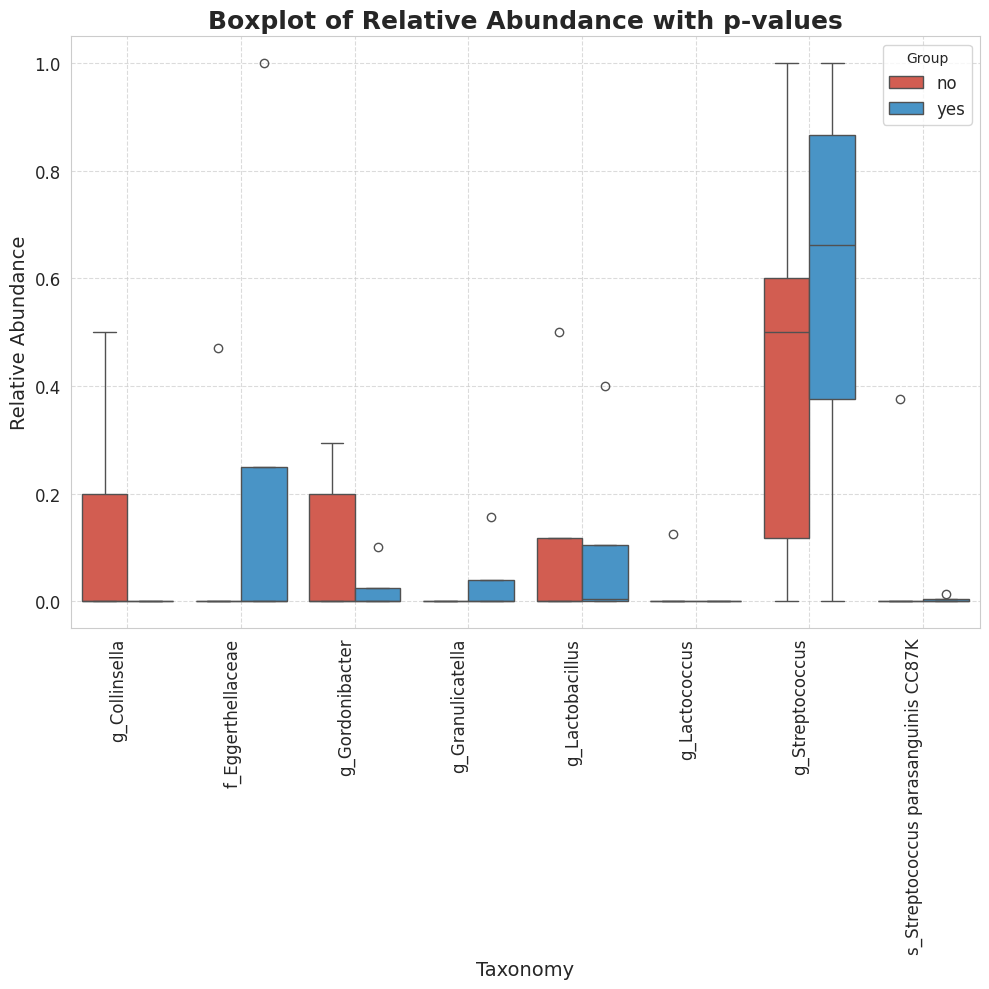

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

def visual_boxplot_yes_no(df):
    # Шаг 1: Расчёт относительного изобилия
    sample_columns = [col for col in df.columns if col != 'Taxonomy']
    df.loc[:, sample_columns] = df[sample_columns].div(df[sample_columns].sum(), axis=1)

    # Шаг 2: Переупорядочивание столбцов
    ordered_columns = ['Taxonomy'] + sample_columns
    df = df[ordered_columns]

    # Шаг 3: Перевод в "длинный" формат
    melted_df = df.melt(id_vars='Taxonomy', var_name='Sample', value_name='Relative Abundance')

    # Шаг 4: Определение групп "yes" и "no"
    melted_df['Group'] = melted_df['Sample'].apply(lambda x: 'yes' if 'yes' in x else 'no')
    # Настройка визуализации
    sns.set_style("whitegrid")

    # Расчёт p-значений
    significant_taxa = {}
    for taxon in melted_df['Taxonomy'].unique():
        yes_values = melted_df[(melted_df['Taxonomy'] == taxon) & (melted_df['Group'] == 'yes')]['Relative Abundance']
        no_values = melted_df[(melted_df['Taxonomy'] == taxon) & (melted_df['Group'] == 'no')]['Relative Abundance']
        
        if len(yes_values) > 1 and len(no_values) > 1:
            t_stat, p_val = ttest_ind(yes_values, no_values, nan_policy='omit')
    #        if p_val < 0.05:
            significant_taxa[taxon] = p_val

    # Фильтрация для значимых таксонов
    significant_melted_df = melted_df[melted_df['Taxonomy'].isin(significant_taxa.keys())]

    # Визуализация
    palette = {'yes': '#3498db', 'no': '#e74c3c'}
    plt.figure(figsize=(10, 10))
    sns.boxplot(x='Taxonomy', y='Relative Abundance', hue='Group', data=significant_melted_df, palette=palette)

    # Оформление графика
    plt.xticks(rotation=90, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Taxonomy', fontsize=14)
    plt.ylabel('Relative Abundance', fontsize=14)
    plt.title('Boxplot of Relative Abundance with p-values', fontsize=18, fontweight='bold')
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.legend(loc="upper right", fontsize=12, title="Group")
    plt.tight_layout()
    plt.savefig('figures/lacto_bifido_coll_corio_yes_no.pdf', bbox_inches = 'tight')
    for taxon, p_val in significant_taxa.items():
        print(f"Таксон: {taxon}, p-value: {p_val:.4f}")
    print('\n\n')


visual_boxplot_yes_no(viz_merged_group_final)

Таксон: g_Collinsella, p-value: 0.3707
Таксон: f_Eggerthellaceae, p-value: 0.9715
Таксон: g_Gordonibacter, p-value: 0.5734
Таксон: g_Granulicatella, p-value: 0.5165
Таксон: g_Lactobacillus, p-value: 0.4564
Таксон: g_Lactococcus, p-value: 0.5165
Таксон: g_Streptococcus, p-value: 0.3124
Таксон: s_Streptococcus parasanguinis CC87K, p-value: 0.4991





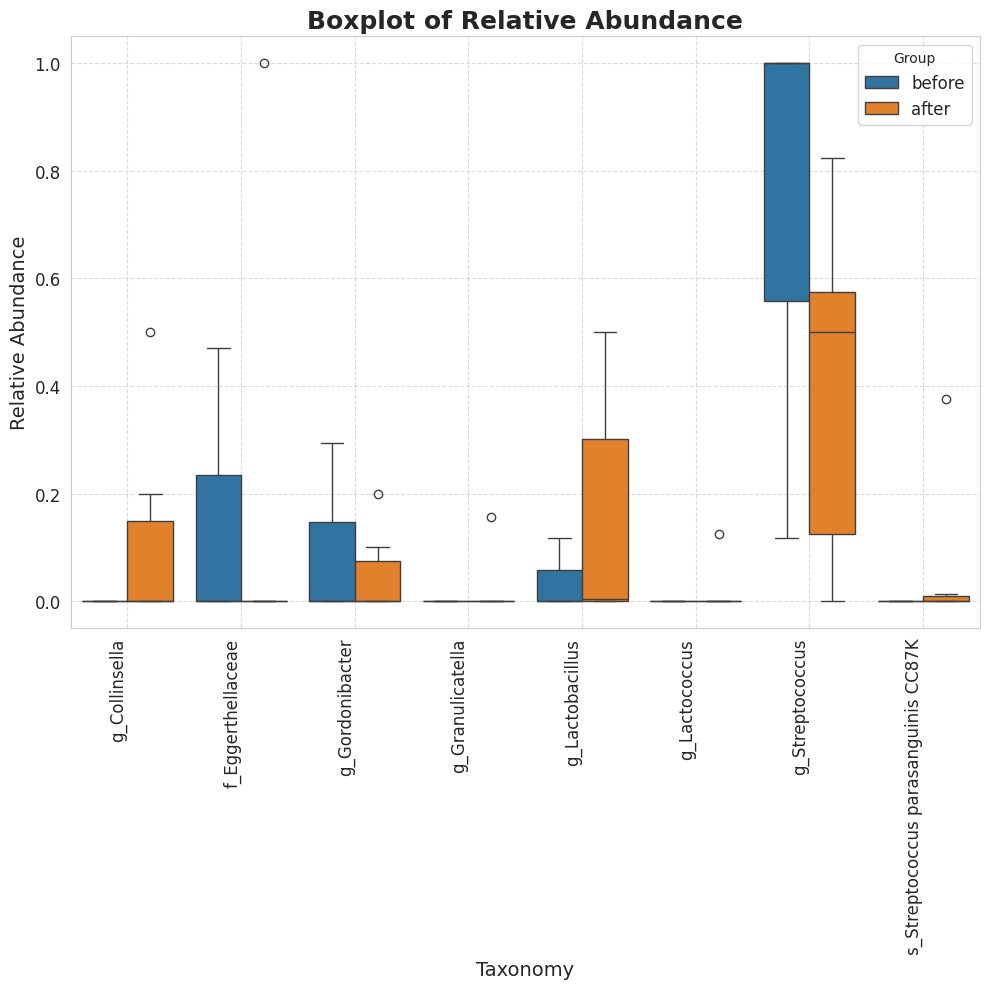

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

def visual_boxplot(df):
    # Шаг 1: Расчёт относительного изобилия
    sample_columns = [col for col in df.columns if col != 'Taxonomy']
    df[sample_columns] = df[sample_columns].div(df[sample_columns].sum(), axis=1)

    # Шаг 2: Переупорядочивание столбцов
    ordered_columns = ['Taxonomy'] + sample_columns
    df = df[ordered_columns]

    # Шаг 3: Перевод в "длинный" формат
    melted_df = df.melt(id_vars='Taxonomy', var_name='Sample', value_name='Relative Abundance')

    # Шаг 4: Определение групп
    melted_df['Group'] = melted_df['Sample'].apply(lambda x: 'before' if 'before' in x else 'after')

    # Настройка визуализации
    sns.set_style("whitegrid")
    flierprops = dict(marker='o', markerfacecolor='black', markersize=6, linestyle='none')

    # Расчёт p-значений
    significant_taxa = {}
    for taxon in melted_df['Taxonomy'].unique():
        before_values = melted_df[(melted_df['Taxonomy'] == taxon) & (melted_df['Group'] == 'before')]['Relative Abundance']
        after_values = melted_df[(melted_df['Taxonomy'] == taxon) & (melted_df['Group'] == 'after')]['Relative Abundance']
        
        if len(before_values) > 1 and len(after_values) > 1:
            t_stat, p_val = ttest_ind(before_values, after_values, nan_policy='omit')
#            if p_val < 0.05
            significant_taxa[taxon] = p_val

    # Фильтрация для значимых таксонов
    significant_melted_df = melted_df[melted_df['Taxonomy'].isin(significant_taxa.keys())]
    colors = ['#3498db', '#e74c3c']
    # Визуализация
    palette = {'before': '#3498db', 'after': '#e74c3c'}
    plt.figure(figsize=(10, 10))
    sns.boxplot(x='Taxonomy', y='Relative Abundance', hue='Group', data=melted_df)

    # Оформление графика
    plt.xticks(rotation=90, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Taxonomy', fontsize=14)
    plt.ylabel('Relative Abundance', fontsize=14)
    plt.title('Boxplot of Relative Abundance', fontsize=18, fontweight='bold')
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.legend(loc="upper right", fontsize=12, title="Group")
    plt.tight_layout()
    plt.savefig('figures/lacto_bifido_coll_corio.pdf', bbox_inches = 'tight')
    for taxon, p_val in significant_taxa.items():
        print(f"Таксон: {taxon}, p-value: {p_val:.4f}")
    print('\n\n')

visual_boxplot(viz_merged_final)